In [1]:
#Import the Libraries and dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
import seaborn as sns
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [2]:
dataset_df = pd.read_csv('atlantic.csv',error_bad_lines=False)




In [3]:
dataset_df.drop(['ID','Name', 'Time' , 'Event' , 'Latitude', 'Maximum Wind', 'Minimum Pressure','Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW' , 'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW' ,'Longitude' , 'Low Wind NE' ,'Low Wind SE'], inplace=True ,axis = 1)


In [4]:
dataset_df['Date']=pd.to_datetime(dataset_df['Date'].astype(str), format='%Y/%m/%d')

In [5]:
dataset_df

,Date,Status
0,1851-06-25 00:00:00,HU
1,1851-06-25 00:00:00,HU
2,1851-06-25 00:00:00,HU
3,1851-06-25 00:00:00,HU
4,1851-06-25 00:00:00,HU
5,1851-06-26 00:00:00,HU
6,1851-06-26 00:00:00,TS
7,1851-06-26 00:00:00,TS
8,1851-06-26 00:00:00,TS
9,1851-06-27 00:00:00,TS


In [6]:
dataset_df['Status'].value_counts()

 TS    17804
 HU    14537
 TD     9891
 EX     4798
 LO     1005
 SS      557
 SD      293
 WV      116
 DB      104
Name: Status, dtype: int64

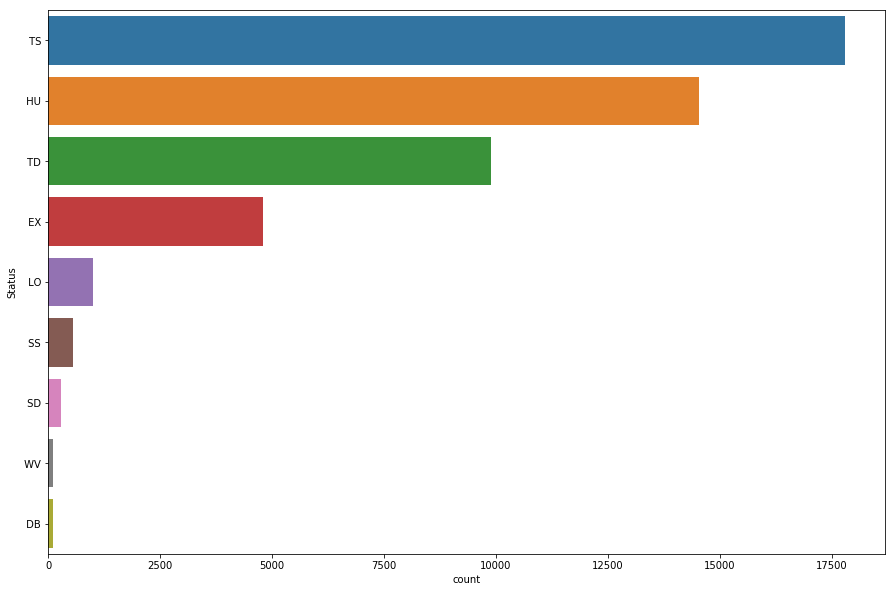

In [7]:
plt.figure(figsize=(15,10))
sns.countplot(y = 'Status' , data = dataset_df, order = dataset_df['Status'].value_counts().iloc[:15].index)

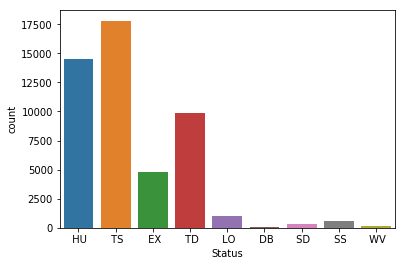

In [8]:
sns.countplot(x = 'Status' ,data = dataset_df)

In [9]:

dataset_df.index = pd.DatetimeIndex(dataset_df.Date)



In [10]:
dataset_df.resample('Y').size()

Date
1851-12-31 00:00:00     98
1852-12-31 00:00:00    134
1853-12-31 00:00:00    100
1854-12-31 00:00:00     60
1855-12-31 00:00:00     35
1856-12-31 00:00:00     95
1857-12-31 00:00:00    104
1858-12-31 00:00:00     86
1859-12-31 00:00:00     97
1860-12-31 00:00:00    122
1861-12-31 00:00:00    110
1862-12-31 00:00:00     88
1863-12-31 00:00:00    111
1864-12-31 00:00:00     67
1865-12-31 00:00:00     95
1866-12-31 00:00:00    123
1867-12-31 00:00:00    119
1868-12-31 00:00:00     71
1869-12-31 00:00:00     90
1870-12-31 00:00:00    163
1871-12-31 00:00:00    212
1872-12-31 00:00:00    182
1873-12-31 00:00:00    157
1874-12-31 00:00:00    164
1875-12-31 00:00:00    155
1876-12-31 00:00:00    132
1877-12-31 00:00:00    220
1878-12-31 00:00:00    391
1879-12-31 00:00:00    189
1880-12-31 00:00:00    308
                      ... 
1986-12-31             232
1987-12-31             370
1988-12-31             430
1989-12-31             452
1990-12-31             502
1991-12-31             

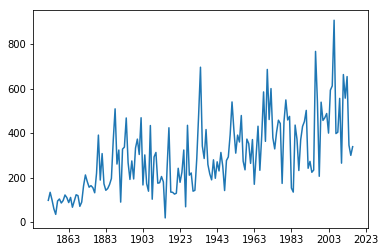

In [19]:
plt.plot(dataset_df.resample('Y').size())

In [20]:
dataset_prophet = dataset_df.resample('M').size().reset_index()


In [21]:
dataset_prophet

,Date,0
0,1851-06-30 00:00:00,14
1,1851-07-31 00:00:00,2
2,1851-08-31 00:00:00,49
3,1851-09-30 00:00:00,16
4,1851-10-31 00:00:00,17
5,1851-11-30 00:00:00,0
6,1851-12-31 00:00:00,0
7,1852-01-31 00:00:00,0
8,1852-02-29 00:00:00,0
9,1852-03-31 00:00:00,0


In [22]:
dataset_prophet.columns = ['Date','Status']

In [23]:
dataset_prophet

,Date,Status
0,1851-06-30 00:00:00,14
1,1851-07-31 00:00:00,2
2,1851-08-31 00:00:00,49
3,1851-09-30 00:00:00,16
4,1851-10-31 00:00:00,17
5,1851-11-30 00:00:00,0
6,1851-12-31 00:00:00,0
7,1852-01-31 00:00:00,0
8,1852-02-29 00:00:00,0
9,1852-03-31 00:00:00,0


In [24]:
dataset_prophet = pd.DataFrame(dataset_prophet)

In [25]:
dataset_prophet

,Date,Status
0,1851-06-30 00:00:00,14
1,1851-07-31 00:00:00,2
2,1851-08-31 00:00:00,49
3,1851-09-30 00:00:00,16
4,1851-10-31 00:00:00,17
5,1851-11-30 00:00:00,0
6,1851-12-31 00:00:00,0
7,1852-01-31 00:00:00,0
8,1852-02-29 00:00:00,0
9,1852-03-31 00:00:00,0


In [26]:
dataset_prophet.columns


Index([u'Date', u'Status'], dtype='object')

In [29]:
dataset_prophet_final = dataset_prophet.rename(columns = {'Date': 'ds', 'Status':'y'})

In [30]:
dataset_prophet_final

,ds,y
0,1851-06-30 00:00:00,14
1,1851-07-31 00:00:00,2
2,1851-08-31 00:00:00,49
3,1851-09-30 00:00:00,16
4,1851-10-31 00:00:00,17
5,1851-11-30 00:00:00,0
6,1851-12-31 00:00:00,0
7,1852-01-31 00:00:00,0
8,1852-02-29 00:00:00,0
9,1852-03-31 00:00:00,0


In [31]:
m = Prophet()

m.fit(dataset_prophet_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/mymac/miniconda2/lib/python2.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [36]:
future = m.make_future_dataframe(periods=320)
forecast = m.predict(future)

In [37]:
forecast

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,yhat
0,1851-06-30 00:00:00,6.357699,6.357699,6.357699,-40.933300,35.055603,-8.057367,-8.057367,-8.057367,0.0,0.0,0.0,-8.057367,-8.057367,-8.057367,-1.699668
1,1851-07-31 00:00:00,6.385261,6.385261,6.385261,-33.207301,39.711006,-3.081964,-3.081964,-3.081964,0.0,0.0,0.0,-3.081964,-3.081964,-3.081964,3.303297
2,1851-08-31 00:00:00,6.412823,6.412823,6.412823,9.424560,84.772645,41.255690,41.255690,41.255690,0.0,0.0,0.0,41.255690,41.255690,41.255690,47.668513
3,1851-09-30 00:00:00,6.439496,6.439496,6.439496,53.717621,126.166870,83.330606,83.330606,83.330606,0.0,0.0,0.0,83.330606,83.330606,83.330606,89.770102
4,1851-10-31 00:00:00,6.467058,6.467058,6.467058,4.954660,80.674819,37.630355,37.630355,37.630355,0.0,0.0,0.0,37.630355,37.630355,37.630355,44.097413
5,1851-11-30 00:00:00,6.493731,6.493731,6.493731,-38.226430,36.611087,-6.707213,-6.707213,-6.707213,0.0,0.0,0.0,-6.707213,-6.707213,-6.707213,-0.213483
6,1851-12-31 00:00:00,6.521293,6.521293,6.521293,-47.054011,23.541879,-20.008690,-20.008690,-20.008690,0.0,0.0,0.0,-20.008690,-20.008690,-20.008690,-13.487397
7,1852-01-31 00:00:00,6.548855,6.548855,6.548855,-52.573030,18.326550,-24.514852,-24.514852,-24.514852,0.0,0.0,0.0,-24.514852,-24.514852,-24.514852,-17.965997
8,1852-02-29 00:00:00,6.574638,6.574638,6.574638,-60.260984,11.831500,-29.751095,-29.751095,-29.751095,0.0,0.0,0.0,-29.751095,-29.751095,-29.751095,-23.176457
9,1852-03-31 00:00:00,6.602200,6.602200,6.602200,-57.490238,16.631083,-28.276494,-28.276494,-28.276494,0.0,0.0,0.0,-28.276494,-28.276494,-28.276494,-21.674294


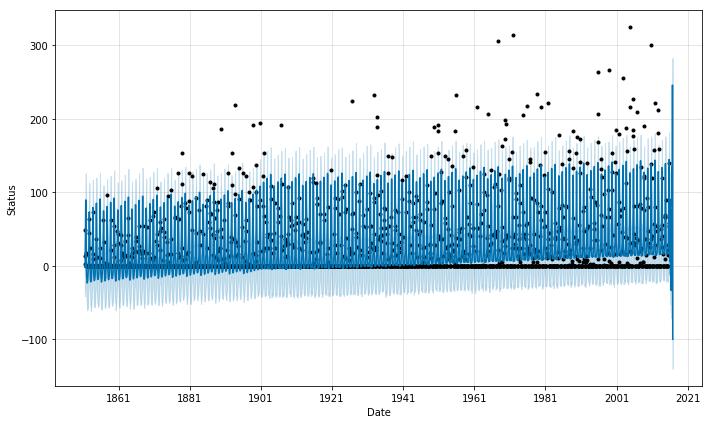

In [38]:
figure = m.plot(forecast, xlabel='Date' , ylabel='Status')

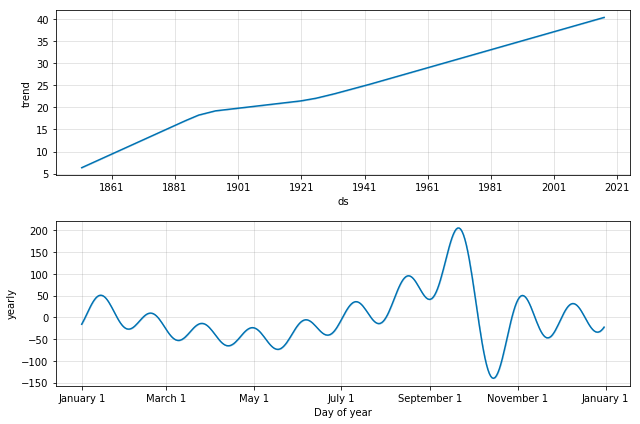

In [39]:
figure3 = m.plot_components(forecast)